In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import read_csv
import seaborn as sb
from sklearn.cluster import KMeans
import random
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from skfuzzy.cluster import cmeans
import skfuzzy
%matplotlib inline

In [2]:
df = pd.read_csv("Dados_JPS_12B1.csv", sep = ',' ,decimal='.')
df.drop(columns='Unnamed: 6', inplace = True)
df.head()

,DIA,MES,ANO,HORA,MINUTO,Potencia
0,1,1,2008,0,0,7.9
1,1,1,2008,0,15,7.7
2,1,1,2008,0,30,7.7
3,1,1,2008,0,45,7.4
4,1,1,2008,1,0,7.4


In [3]:
df['Data'] = pd.to_datetime(df[['DIA','MES','ANO','HORA','MINUTO']]
                            .astype(str).apply(' '.join, 1), format='%d %m %Y %H %M')

In [4]:
df.set_index('Data', inplace=True)
df.drop(columns=['DIA','MES','ANO','HORA','MINUTO'], axis=1, inplace=True)
df.head()

,Potencia
Data,
2008-01-01 00:00:00,7.9
2008-01-01 00:15:00,7.7
2008-01-01 00:30:00,7.7
2008-01-01 00:45:00,7.4
2008-01-01 01:00:00,7.4


In [5]:
df.describe()

,Potencia
count,210432.000000
mean,12.297258
std,4.129985
min,0.000000
25%,9.200000
50%,11.300000
75%,14.900000
max,24.100000


In [6]:
df_max_2008= df['Potencia'].loc['2008']
df_max_2009= df['Potencia'].loc['2009']
df_max_2010= df['Potencia'].loc['2010']
df_max_2011= df['Potencia'].loc['2011']
df_max_2012= df['Potencia'].loc['2012']
df_max_2013= df['Potencia'].loc['2013']

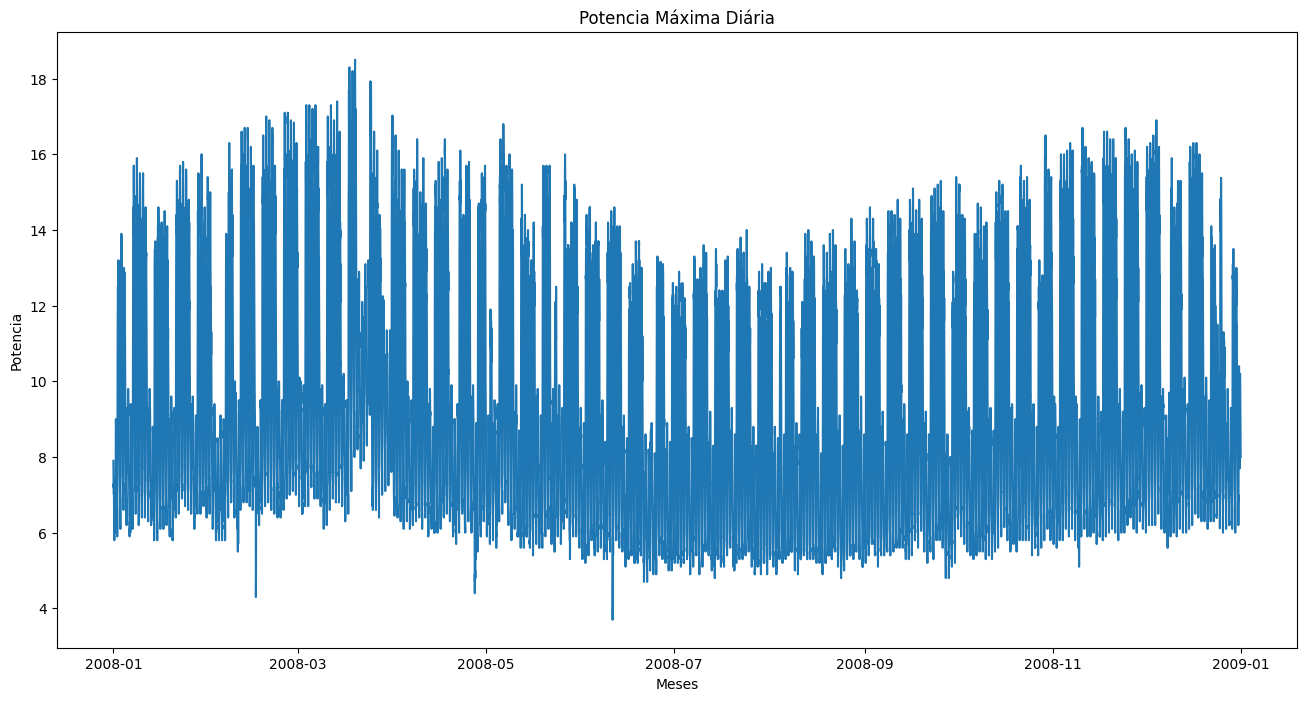

In [7]:
plt.figure(figsize=(16,8))
plt.title('Potencia Máxima Diária')
plt.xlabel('Meses')
plt.ylabel('Potencia')
plt.plot(df_max_2008)

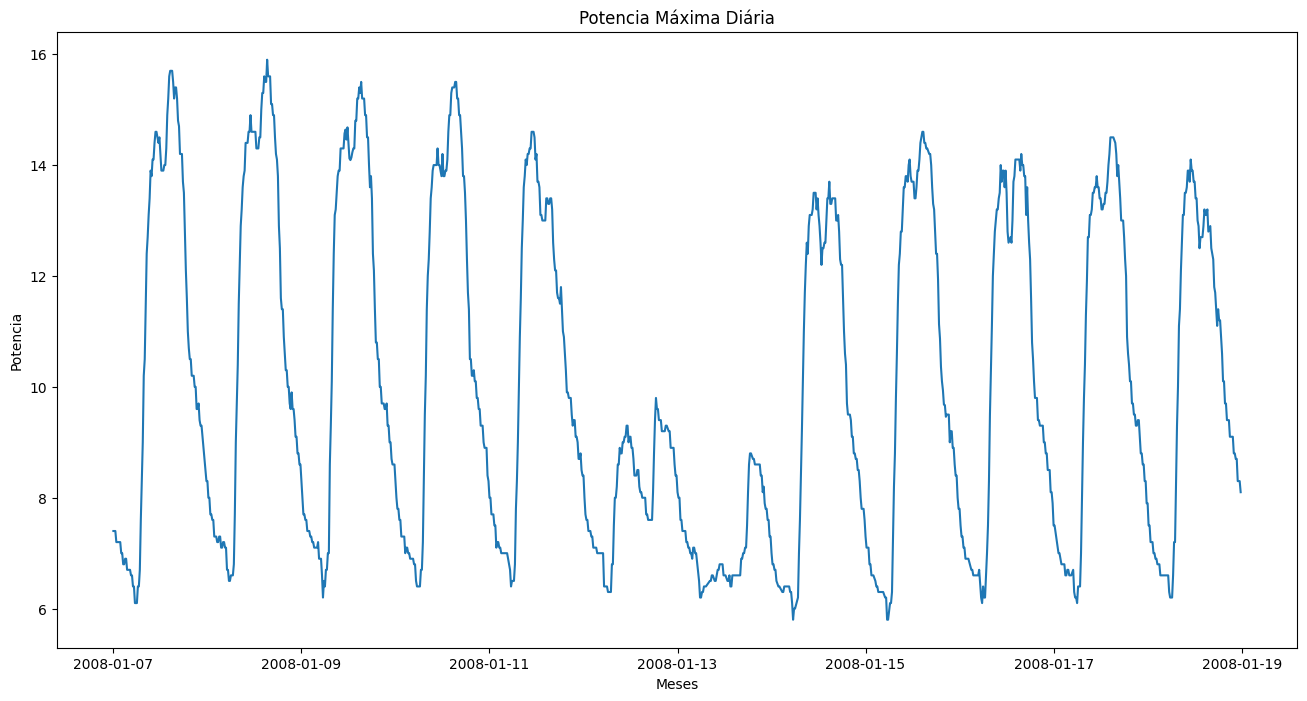

In [8]:
#dias = número de dias para plotar
dias = 18
df_max1 = df['Potencia'].iloc[576:dias*96]   
df_max2 = df['Potencia'].iloc[576:dias*96] 
plt.figure(figsize=(16,8))
plt.title('Potencia Máxima Diária')
plt.xlabel('Meses')
plt.ylabel('Potencia')
plt.plot(df_max1)

### Inserindo Outliers no periodo de 2008

In [9]:
df_max_2008.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 35136 entries, 2008-01-01 00:00:00 to 2008-12-31 23:45:00
Series name: Potencia
Non-Null Count  Dtype  
--------------  -----  
35136 non-null  float64
dtypes: float64(1)
memory usage: 549.0 KB


### Outliers min

In [10]:

N = 35136
num_outliers = int(0.10 * N)

# gerando aleatoriamente os índices das amostras de outliers
outlier_indices = random.sample(range(N), num_outliers)



In [11]:
for idx in outlier_indices:
    df_max_2008[idx] = 0

### Outliers max

In [12]:
N = 35136
num_outliers_pico = int(0.10 * N)

# gerando aleatoriamente os índices das amostras de outliers
outlier_indices_pico = random.sample(range(N), num_outliers_pico)

In [13]:
for idx in outlier_indices_pico:
    # amplitude aleatória entre 18 e 25
    amplitude = random.uniform(18, 25)
    df_max_2008[idx] = amplitude

### Plotando após inserir os outliers

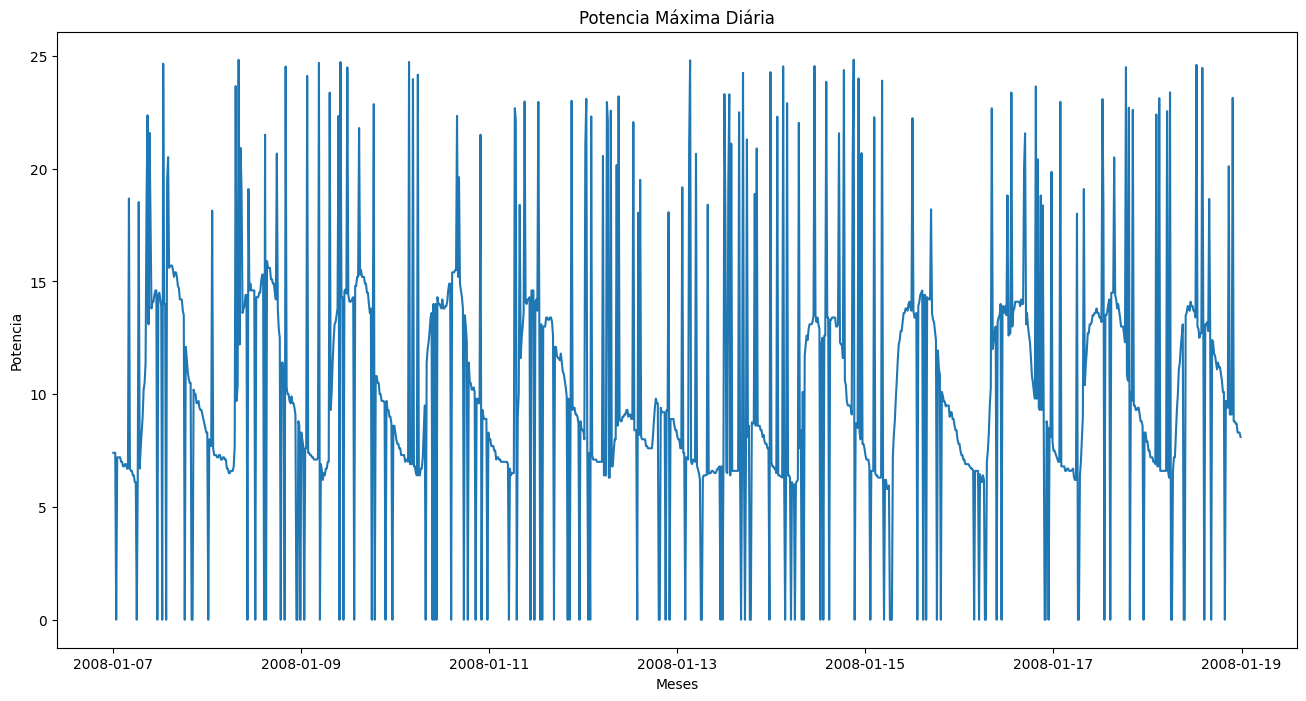

In [14]:
plt.figure(figsize=(16,8))
plt.title('Potencia Máxima Diária')
#plt.yticks([0,18])

plt.xlabel('Meses')
plt.ylabel('Potencia')
plt.plot(df_max1)

### Usando o método do cotovelo determinar o número ótimo de cluster para este conjunto de dados

In [15]:
potencia_array_2008 = df_max_2008.values.reshape(-1, 1)
potencia_array_2008

array([[7.9000001 ],
       [7.69999981],
       [7.69999981],
       ...,
       [0.        ],
       [8.30000019],
       [8.        ]])

In [16]:
X = potencia_array_2008
inertia = []

# Teste o número de clusters de 1 a 10 (você pode ajustar esse intervalo)
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)



C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

Text(0, 0.5, 'Inércia')

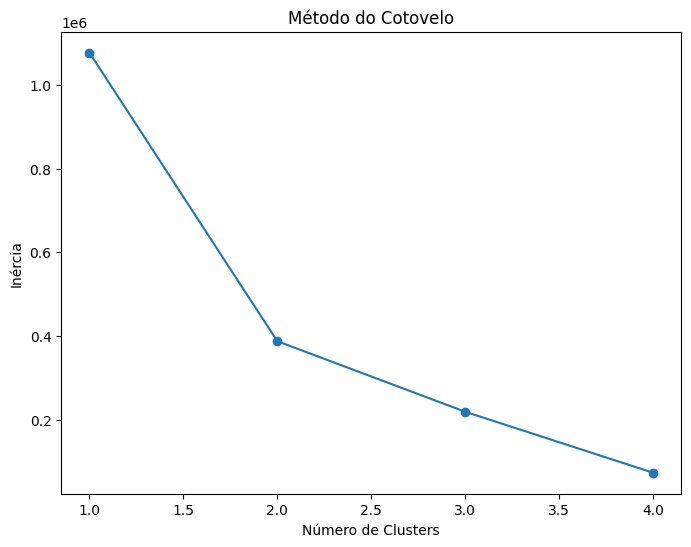

In [17]:
# Plote da curva de cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')

In [18]:
df_2008 = df_max_2008.to_frame()

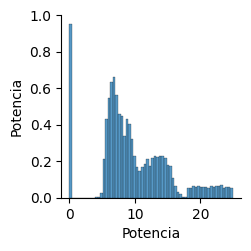

In [19]:
sb.pairplot(df_2008)

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


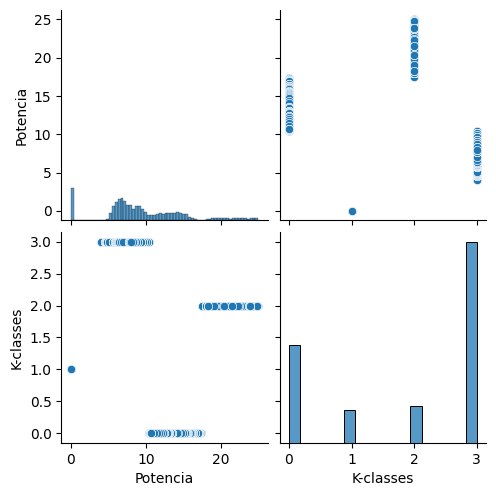

In [20]:
P = np.array(df_2008) 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(P)
kmeans.labels_

#centros dos clusters  [Centro  K-Classes]
#Neste caso o Centro=0, fornece como classe=3
#Portanto, deve filtrar posteriormente a classe 3 para extrair os outliers
kmeans.cluster_centers_

centroides=kmeans.cluster_centers_
#Pegando os labels(clusters) e colocando ao Dataframe df2
df_2008['K-classes'] = kmeans.labels_
df_2008.head()
sb.pairplot(df_2008)

In [21]:
centroides

array([[ 1.33719102e+01],
       [-2.66453526e-14],
       [ 2.14792400e+01],
       [ 7.50616992e+00]])

In [22]:
Classe_Zero = np.argmin(centroides)
Classe_Zero   

1

In [23]:
Classe_Picos = np.argmax(centroides)
Classe_Picos 

2

In [24]:
#Filtrando Elementos com a classe que contem os ZEROS ou PROXIMOS DO ZERO
df_2008[df_2008['K-classes']==Classe_Zero]

,Potencia,K-classes
Data,,
2008-01-01 02:00:00,0.0,1
2008-01-01 03:30:00,0.0,1
2008-01-01 05:45:00,0.0,1
2008-01-01 08:15:00,0.0,1
2008-01-01 14:15:00,0.0,1
...,...,...
2008-12-31 11:30:00,0.0,1
2008-12-31 18:45:00,0.0,1
2008-12-31 20:00:00,0.0,1


In [25]:
#Filtrando Elementos com a classe que contem os PICOS POSITIVOS
df_2008[df_2008['K-classes']==Classe_Picos ]

,Potencia,K-classes
Data,,
2008-01-01 03:00:00,18.772577,2
2008-01-01 06:00:00,20.808979,2
2008-01-01 08:45:00,21.656213,2
2008-01-01 10:30:00,21.701524,2
2008-01-01 11:15:00,18.091427,2
...,...,...
2008-12-31 08:30:00,22.264163,2
2008-12-31 12:45:00,20.384402,2
2008-12-31 14:45:00,23.845931,2


# Métricas de avaliação do método de clusterização

In [26]:
k = 4  # Número de clusters desejado
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_2008)

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [27]:
labels = kmeans.labels_

#### Silhouette Score: O coeficiente de silhueta mede o quão bem os objetos estão agrupados em seus clusters. Um valor próximo de 1 indica que os objetos estão bem agrupados, enquanto um valor próximo de -1 indica que os objetos estão agrupados de forma inadequada. Um valor próximo de 0 significa que os clusters estão no caminho certo.

In [28]:
silhouette_avg = silhouette_score(df_2008, labels)


#### Calinski-Harabasz Index: O índice Calinski-Harabasz (também chamado de critério de variação entre clusters sobre a variação intracluster) mede a relação entre a dispersão média entre os clusters e a dispersão média dentro dos clusters. Valores mais altos do índice indicam clusters mais compactos e separados. Um índice Calinski-Harabasz maior é geralmente desejado, isso é um bom sinal de que a clusterização está separando efetivamente os dados em grupos distintos. 

In [29]:
calinski_harabasz = calinski_harabasz_score(df_2008, labels)

In [30]:
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')


Silhouette Score: 0.7410939306721833
Calinski-Harabasz Index: 168885.19077176362


# Implementar um novo método de clusterização baseado em lógica fuzzy, como por exemplo: Fuzzy C-means,

In [31]:
df_2008["Variacao_Potencia"] = df_2008["Potencia"].diff()
df_2008["Variacao_Potencia"].fillna(0, inplace=True)

In [32]:
df_2008.reset_index(inplace=True)

In [33]:
display(df_2008)

,Data,Potencia,K-classes,Variacao_Potencia
0,2008-01-01 00:00:00,7.9,3,0.0
1,2008-01-01 00:15:00,7.7,3,-0.2
2,2008-01-01 00:30:00,7.7,3,0.0
3,2008-01-01 00:45:00,7.4,3,-0.3
4,2008-01-01 01:00:00,7.4,3,0.0
...,...,...,...,...
35131,2008-12-31 22:45:00,8.7,3,0.0
35132,2008-12-31 23:00:00,8.4,3,-0.3
35133,2008-12-31 23:15:00,0.0,1,-8.4
35134,2008-12-31 23:30:00,8.3,3,8.3


In [34]:
X = df_2008.iloc[:,[1,3]].values

In [35]:
X

array([[ 7.9000001 ,  0.        ],
       [ 7.69999981, -0.20000029],
       [ 7.69999981,  0.        ],
       ...,
       [ 0.        , -8.39999962],
       [ 8.30000019,  8.30000019],
       [ 8.        , -0.30000019]])

In [36]:
X.T.shape

(2, 35136)

In [37]:
r = skfuzzy.cmeans(data = X.T, c = 4, m=2,error = 0.005, maxiter = 1000, init = None)

In [38]:
r

(array([[ 20.48330899,  13.47835843],
        [ 13.39198711,   0.02605124],
        [  3.45311532, -12.63245916],
        [  7.26202299,   0.1275144 ]]),
 array([[1.22332730e-03, 8.43342958e-04, 5.98099966e-04, ...,
         2.38939985e-02, 1.71864121e-01, 2.04047197e-03],
        [1.37898718e-02, 9.10946704e-03, 6.37023629e-03, ...,
         8.57312346e-02, 3.19101711e-01, 2.41722595e-02],
        [2.31909425e-03, 1.71261311e-03, 1.16201762e-03, ...,
         7.19299964e-01, 6.52404449e-02, 4.08270090e-03],
        [9.82667707e-01, 9.88334577e-01, 9.91869646e-01, ...,
         1.71074803e-01, 4.43793723e-01, 9.69704568e-01]]),
 array([[0.2359168 , 0.12476023, 0.32304318, ..., 0.01091104, 0.30874826,
         0.32381841],
        [0.07048336, 0.10680929, 0.41526919, ..., 0.35323801, 0.3496343 ,
         0.13367152],
        [0.35738805, 0.37450948, 0.04643755, ..., 0.18123108, 0.24223347,
         0.5357197 ],
        [0.33621179, 0.393921  , 0.21525008, ..., 0.45461987, 0.09938397,
  

In [39]:
previsoes_porcentagem = r[1]

In [40]:
previsoes_porcentagem.shape

(4, 35136)

In [41]:
previsoes_porcentagem

array([[1.22332730e-03, 8.43342958e-04, 5.98099966e-04, ...,
        2.38939985e-02, 1.71864121e-01, 2.04047197e-03],
       [1.37898718e-02, 9.10946704e-03, 6.37023629e-03, ...,
        8.57312346e-02, 3.19101711e-01, 2.41722595e-02],
       [2.31909425e-03, 1.71261311e-03, 1.16201762e-03, ...,
        7.19299964e-01, 6.52404449e-02, 4.08270090e-03],
       [9.82667707e-01, 9.88334577e-01, 9.91869646e-01, ...,
        1.71074803e-01, 4.43793723e-01, 9.69704568e-01]])

In [42]:
previsoes_porcentagem[0][0]

0.001223327295069704

In [43]:
previsoes_porcentagem[1][0]

0.013789871752409493

In [44]:
previsoes_porcentagem[2][0]

0.0023190942466073264

In [45]:
previsoes_porcentagem[3][0]

0.9826677067059135

In [46]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0] + previsoes_porcentagem[3][0]

1.0

In [47]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [48]:
previsoes

array([3, 3, 3, ..., 2, 3, 3], dtype=int64)

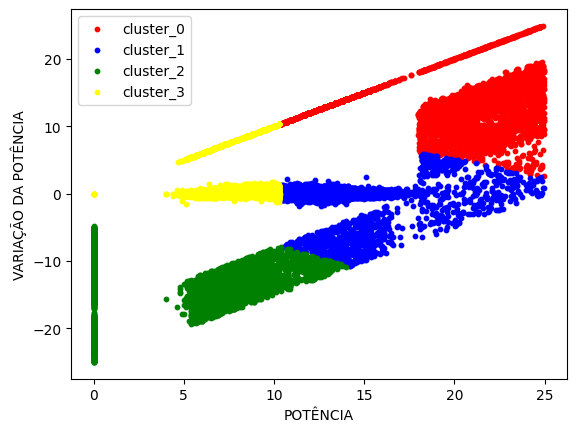

In [49]:
plt.scatter(X[previsoes == 0, 0], X[previsoes ==0,1], s = 10, c = 'red', label = 'cluster_0')
plt.scatter(X[previsoes == 1, 0], X[previsoes ==1,1], s = 10, c = 'blue', label = 'cluster_1')
plt.scatter(X[previsoes == 2, 0], X[previsoes ==2,1], s = 10, c = 'green', label = 'cluster_2')
plt.scatter(X[previsoes == 3, 0], X[previsoes ==3,1], s = 10, c = 'yellow', label = 'cluster_3')
plt.xlabel("POTÊNCIA")
plt.ylabel("VARIAÇÃO DA POTÊNCIA")
plt.legend() 

 #                                                                                  ATIVIDADE 2

## Usando os cluster/grupos definido na atividade 1, gerar novos outliers no banco de dados para realizar a classificação.

### Considerando um total de N amostras de potência no banco de dados, insira de forma aleatória 10%*N amostras de outliers do tipo zero. Salvar os índices deste tipo de outliers para comparações e avaliações do método.

### Outliers min

In [50]:
N = 35136
num_outliers = int(0.10 * N)

# gerando aleatoriamente os índices das amostras de outliers
outlier_indices = random.sample(range(N), num_outliers)

In [51]:
for idx in outlier_indices:
    df_max_2008[idx] = 0

### Considerando um total de N amostras de potência no banco de dados, , insira de forma aleatória 10%*N amostras de outliers do tipo pico, com amplitudes entre 18 a 25. Salvar os índices deste tipo de outliers para comparações e avaliações do método


### Outliers max

In [52]:
N = 35136
num_outliers_pico = int(0.10 * N)

# gerando aleatoriamente os índices das amostras de outliers
outlier_indices_pico = random.sample(range(N), num_outliers_pico)

In [53]:
for idx in outlier_indices_pico:
    # amplitude aleatória entre 18 e 25
    amplitude = random.uniform(18, 25)
    df_max_2008[idx] = amplitude

In [54]:
df_2008 = df_max_2008.to_frame()

In [55]:
df_2008["Variacao_Potencia"] = df_2008["Potencia"].diff()
df_2008["Variacao_Potencia"].fillna(0, inplace=True)

In [56]:
df_2008

,Potencia,Variacao_Potencia
Data,,
2008-01-01 00:00:00,7.900000,0.000000
2008-01-01 00:15:00,7.700000,-0.200000
2008-01-01 00:30:00,7.700000,0.000000
2008-01-01 00:45:00,7.400000,-0.300000
2008-01-01 01:00:00,7.400000,0.000000
...,...,...
2008-12-31 22:45:00,8.700000,-14.963659
2008-12-31 23:00:00,0.000000,-8.700000
2008-12-31 23:15:00,0.000000,0.000000


## Implementar um novo método de classificação baseado em lógica fuzzy

In [85]:

from skfuzzy import control as ctrl
import skfuzzy as fuzz

In [100]:
# variaveis do problema
potencia_universe = ctrl.Antecedent(np.arange(0, 35, 1), 'potencia')
variacao_potencia_universe = ctrl.Antecedent(np.arange(-25, 25, 1), 'variação de potencia')
classe = ctrl.Consequent(np.arange(0, 4, 1), 'classe')

In [101]:
#cria automaticamente entre os valores nitidos e difusos 
#usando uma função de pertinencia (padrão triangulo)
potencia_universe.automf(names=['baixa','média','alta']) 
variacao_potencia_universe.automf(names=['BAIXA','MEDIA','ALTA'])
classe.automf(names=['cluster 1','cluster 2','cluster 3'])

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


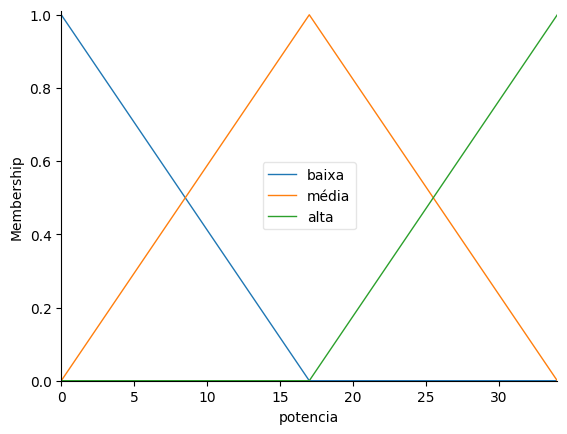

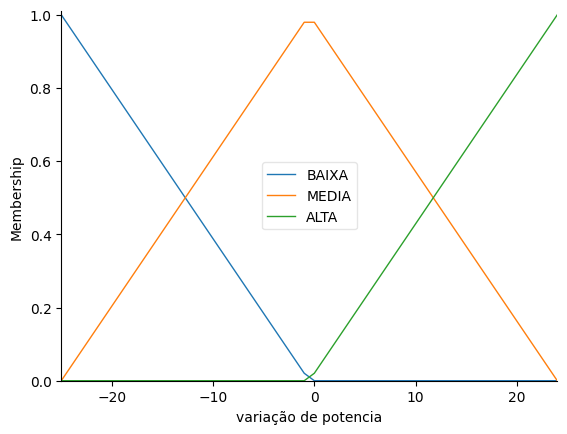

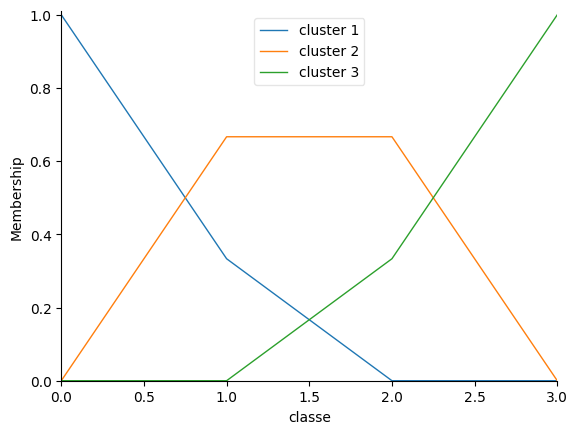

In [102]:
potencia_universe.view()
variacao_potencia_universe.view()
classe.view()

## CRIANDO AS REGRAS

In [103]:
regra1 = ctrl.Rule(potencia_universe['alta']|variacao_potencia_universe['ALTA'],classe['cluster 3'])
regra2 = ctrl.Rule(potencia_universe['média']|variacao_potencia_universe['MEDIA'],classe['cluster 2'])
regra3 = ctrl.Rule(potencia_universe['baixa']|variacao_potencia_universe['BAIXA'],classe['cluster 1'])


In [104]:
classe_ctrl = ctrl.ControlSystem([regra1,regra2,regra3])
classe_simulador = ctrl.ControlSystemSimulation(classe_ctrl) 

#### input para classificação

In [127]:

classe_simulador.input['variação de potencia'] = 0.7
classe_simulador.input['potencia'] = 8.2

In [128]:
# processando resultado
classe_simulador.compute()
print(classe_simulador.output['classe'])


1.356984123999741


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


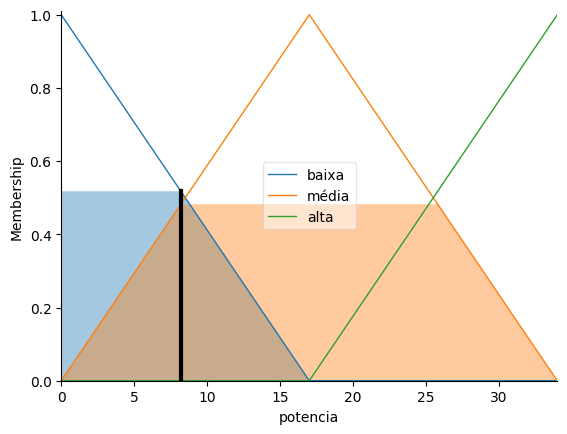

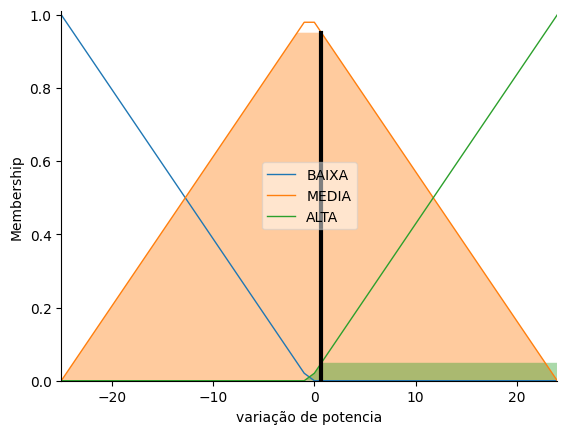

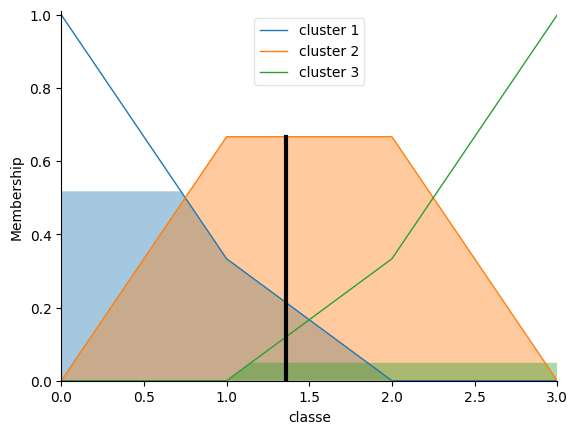

In [129]:
potencia_universe.view(sim=classe_simulador)
variacao_potencia_universe.view(sim=classe_simulador)
classe.view(sim=classe_simulador)